In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from pathlib import Path
import numpy as np

# File location
cleaned_2016 = Path("Resources/2016-cleaned.csv")

# Reading the data
df_2016 = pd.read_csv(cleaned_2016)

# display the first five rows of the df
df_2016.head()

,Unnamed: 0,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave,age groups
0,0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,No Response,Yes,Some of my previous employers,Very easy,35-44
1,1,29,male,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,No Response,Yes,Some of my previous employers,Somewhat easy,25-34
2,2,38,Male,male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult,35-44
3,3,43,male,male,United Kingdom,Sometimes,No Response,Yes,Yes,Yes,Maybe,No,No Response,No Response,Some of my previous employers,No Response,35-44
4,4,43,Female,female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult,35-44


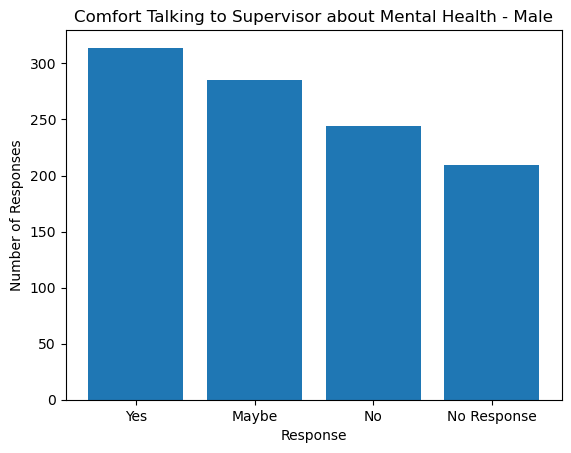

In [3]:
# create a dataframe that only looks at male response to the discussing mental health with current supervisor question
male_2016 = df_2016.loc[df_2016["gender"] == "male", :]
male_mh_2016 = male_2016[["gender","comf_discuss_mh_disorder_cur_superv"]]

# create a new dataframe that counts the values for each response
male_counts = pd.DataFrame(male_mh_2016["comf_discuss_mh_disorder_cur_superv"].value_counts())
male_counts.index.names = ["male response"]

#create a bar chart of the male responses
plt.bar(male_counts.index,male_counts["count"])
plt.title("Comfort Talking to Supervisor about Mental Health - Male")
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.savefig("Figures/Comfort_by_Gender_Male.png")
plt.show()

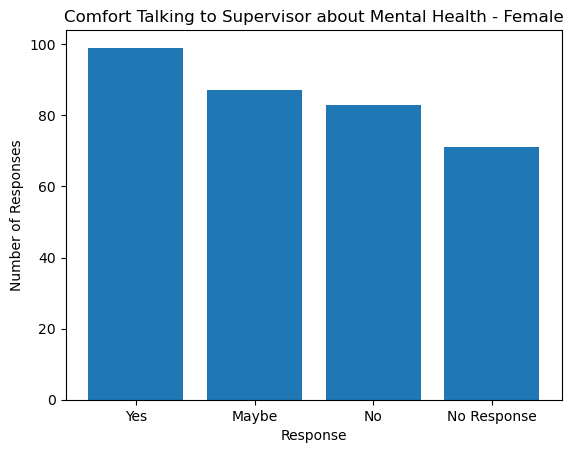

In [4]:
# create a dataframe that only looks at female response to the discussing mental health with current supervisor question
female_2016 = df_2016.loc[df_2016["gender"] == "female", :]
female_mh_2016 = female_2016[["gender","comf_discuss_mh_disorder_cur_superv"]]

# create a new dataframe that counts the values for each response
female_counts = pd.DataFrame(female_mh_2016["comf_discuss_mh_disorder_cur_superv"].value_counts())
female_counts.index.names = ["female response"]

#create a bar chart of the male responses
plt.bar(female_counts.index,female_counts["count"])
plt.title("Comfort Talking to Supervisor about Mental Health - Female")
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.savefig("Figures/Comfort_by_Gender_Female.png")
plt.show()

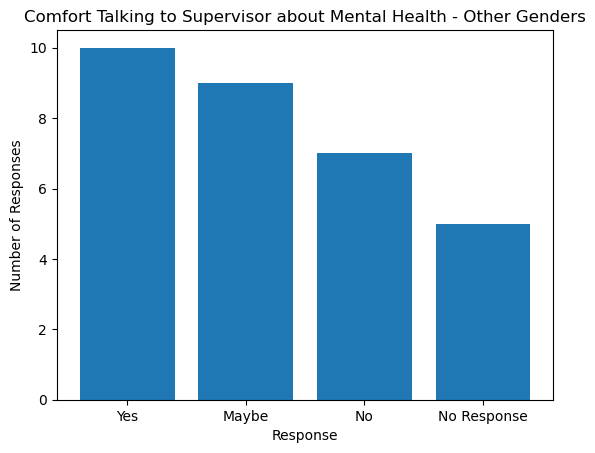

In [5]:
# create a dataframe that only looks at other response to the discussing mental health with current supervisor question
other_2016 = df_2016.loc[df_2016["gender"] == "other", :]
other_mh_2016 = other_2016[["gender","comf_discuss_mh_disorder_cur_superv"]]

# create a new dataframe that counts the values for each response
other_counts = pd.DataFrame(other_mh_2016["comf_discuss_mh_disorder_cur_superv"].value_counts())
other_counts.index.names = ["other response"]

#create a bar chart of the male responses
plt.bar(other_counts.index,other_counts["count"])
plt.title("Comfort Talking to Supervisor about Mental Health - Other Genders")
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.savefig("Figures/Comfort_by_Gender_Other.png")
plt.show()

In [9]:
# get counts of responses for male respondants
print(male_counts)

# find the percentages of total response for each type of response
male_response_sum = male_counts["count"].sum()
male_yes_percentage = round(314/male_response_sum*100, 2)
male_maybe_percentage = round(285/male_response_sum*100, 2)
male_no_percentage = round(244/male_response_sum*100, 2)
male_no_resp_percentage = round(209/male_response_sum*100, 2)
male_percentages = [male_yes_percentage,male_maybe_percentage,male_no_percentage,male_no_resp_percentage]
print(male_percentages)

               count
male response       
Yes              314
Maybe            285
No               244
No Response      209
[29.85, 27.09, 23.19, 19.87]


In [11]:
# get counts of responses for female respondants
print(female_counts)

# find the percentages of total response for each type of response
female_response_sum = female_counts["count"].sum()
female_yes_percentage = round(99/female_response_sum*100, 2)
female_maybe_percentage = round(87/female_response_sum*100, 2)
female_no_percentage = round(83/female_response_sum*100, 2)
female_no_resp_percentage = round(71/female_response_sum*100, 2)
female_percentages = [female_yes_percentage,female_maybe_percentage,female_no_percentage,female_no_resp_percentage]
print(female_percentages)

                 count
female response       
Yes                 99
Maybe               87
No                  83
No Response         71
[29.12, 25.59, 24.41, 20.88]


In [12]:
# get counts of responses for other respondants
print(other_counts)

# find the percentages of total response for each type of response
other_response_sum = other_counts["count"].sum()
other_yes_percentage = round(10/other_response_sum*100, 2)
other_maybe_percentage = round(9/other_response_sum*100, 2)
other_no_percentage = round(7/other_response_sum*100, 2)
other_no_resp_percentage = round(5/other_response_sum*100, 2)
other_percentages = [other_yes_percentage,other_maybe_percentage,other_no_percentage,other_no_resp_percentage]
print(other_percentages)

                count
other response       
Yes                10
Maybe               9
No                  7
No Response         5
[32.26, 29.03, 22.58, 16.13]


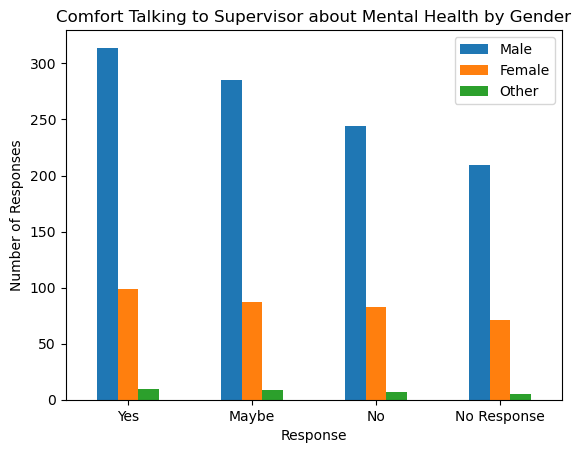

In [14]:
# create lists to hold the variables
responses = ['Yes','Maybe', 'No', 'No Response']
male_responses = [314,285,244,209]
female_responses = [99,87,83,71]
other_responses = [10,9,7,5]

# create a dataframe with the variables
# link to website I found code from: https://pandas.pydata.org/pandas-docs/version/0.23.3/generated/pandas.DataFrame.plot.bar.html
response_df = pd.DataFrame({'Male': male_responses, 'Female': female_responses, 'Other': other_responses}, index=responses)
ax = response_df.plot.bar(rot=0)
plt.title("Comfort Talking to Supervisor about Mental Health by Gender")
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.savefig("Figures/Comfort_by_Gender_All.png")
plt.show()

In [ ]:
# create a dataframe to show the number of respondants by gender
respondant_gender_count = pd.DataFrame(df_2016["gender"].value_counts())
respondant_gender_count

,count
gender,
male,1052
female,340
other,31


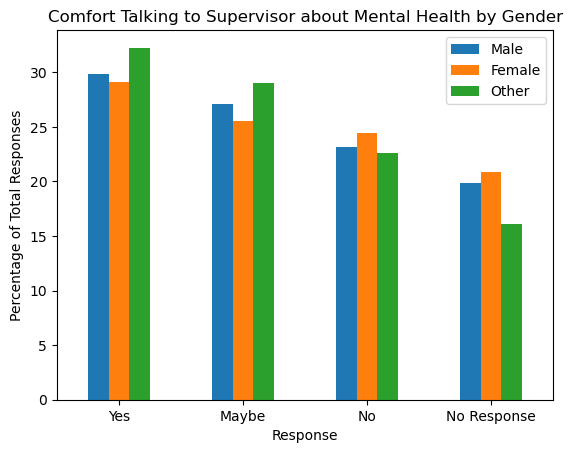

In [15]:
# make chart that looks at percentage of gender for each response
responses = ['Yes','Maybe', 'No', 'No Response']

# create a dataframe with the variables
# link to website I found code from: https://pandas.pydata.org/pandas-docs/version/0.23.3/generated/pandas.DataFrame.plot.bar.html
response_df = pd.DataFrame({'Male': male_percentages, 'Female': female_percentages, 'Other': other_percentages}, index=responses)
ax = response_df.plot.bar(rot=0)
plt.title("Comfort Talking to Supervisor about Mental Health by Gender")
plt.xlabel("Response")
plt.ylabel("Percentage of Total Responses")
plt.savefig("Figures/Comfort_by_Gender_Proportions_All.png")
plt.show()